*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 13 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [ ]:
!pip3 install pandas==1.0.5

     |████████████████████████████████| 10.1MB 4.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [ ]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

Import your dataset using the following cells for the Youtube videos

In [ ]:
from google.colab import files
uploaded = files.upload()

!unzip /content/youtube_data.zip

Saving youtube_data.zip to youtube_data.zip
Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  

# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [ ]:
# Import all the csv files
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
list_df_file = []
for file in files:
  df_file = pd.read_csv(file)
  df_file['country'] = os.path.basename(file)
  list_df_file.append(df_file)
combined_data   = pd.concat(list_df_file)




In [ ]:
combined_data.shape

(159906, 17)

#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [ ]:
combined_data['category_id'] = combined_data['category_id'].astype(str)

# Add code here
category = pd.json_normalize(pd.read_json('/content/youtube_data/US_category_id.json')['items'])[['id','snippet.title']]
category.rename(columns={'snippet.title':'category'},inplace=True)
category['id'] = category['id'].astype(str)
combined_data = combined_data.merge(category,left_on='category_id',right_on='id')
combined_data.drop(columns='id',inplace=True)


In [ ]:
combined_data[['category_id','category']]

,category_id,category
0,24,Entertainment
1,24,Entertainment
2,24,Entertainment
3,24,Entertainment
4,24,Entertainment
...,...,...
159901,30,Movies
159902,30,Movies
159903,30,Movies
159904,44,Trailers


#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [ ]:
# Add code here
combined_data['trending_date'] = pd.to_datetime(combined_data['trending_date'],format='%y.%d.%m')
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'])

# Add your Code here to remove NA's
combined_data = combined_data.dropna()



In [ ]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 18)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [ ]:
combined_data.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                            object
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
country                                object
category                               object
dtype: object

In [ ]:
views_max = combined_data['views'].max()
views_min = combined_data['views'].min()
views_mean= combined_data['views'].mean()
views_std= combined_data['views'].std()
likes_max = combined_data['likes'].max()
likes_min = combined_data['likes'].min()
likes_mean= combined_data['likes'].mean()
likes_std= combined_data['likes'].std()
dislikes_max = combined_data['dislikes'].max()
dislikes_min = combined_data['dislikes'].min()
dislikes_mean= combined_data['dislikes'].mean()
dislikes_std= combined_data['dislikes'].std()
comment_count_max = combined_data['comment_count'].max()
comment_count_min = combined_data['comment_count'].min()
comment_count_mean= combined_data['comment_count'].mean()
comment_count_std= combined_data['comment_count'].std()

In [ ]:
# Add your code here
maxs = [views_max,likes_max,dislikes_max,comment_count_max]
mins = [views_min,likes_min,dislikes_min,comment_count_min]
stds = [views_std,likes_std,dislikes_std,comment_count_std]
means = [views_mean,likes_mean,dislikes_mean,comment_count_mean]




In [ ]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[225211923, 5613827, 1643059, 1228655], [223, 0, 0, 0], [4605292.478385805, 152148.95485475098, 18258.541379661412, 23278.22562061964], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [ ]:
# Add your code here
combined_data['likes_log'] = np.log(combined_data['likes']+1)
combined_data['views_log'] = np.log(combined_data['views']+1)
combined_data['dislikes_log'] = np.log(combined_data['dislikes']+1)
combined_data['comment_log'] = np.log(combined_data['comment_count']+1)



In [ ]:
# Print results

print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.5715901871888, 12.552679805013412, 5.614484952081086, 6.424543615108431]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


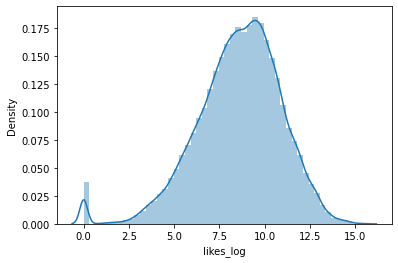

In [ ]:
# Add your code here for plotting the distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot( combined_data['likes_log'] )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


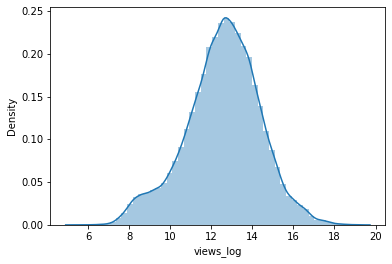

In [ ]:
sns.distplot( combined_data['views_log'] )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


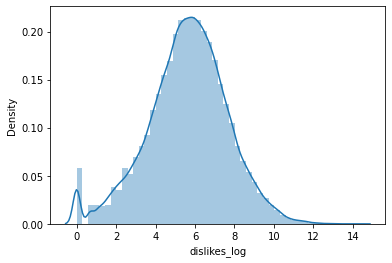

In [ ]:
sns.distplot( combined_data['dislikes_log'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


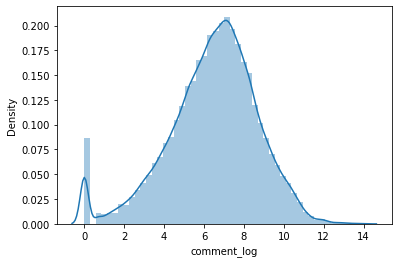

In [ ]:
sns.distplot( combined_data['comment_log'])

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

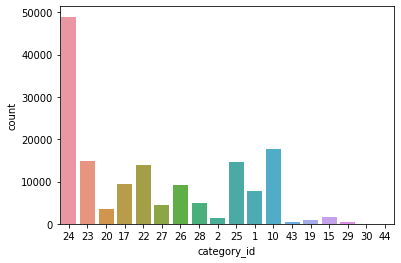

In [ ]:
# Your code goes here
# Plots will be manually graded
ax = sns.countplot(x=combined_data['category_id'])

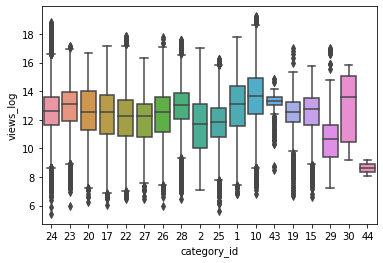

In [ ]:
sns.boxplot(x='category_id', y='views_log', data=combined_data)

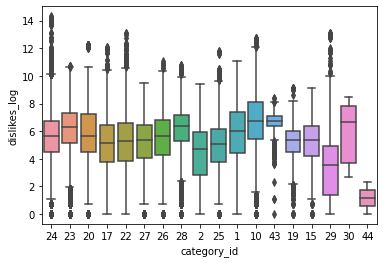

In [ ]:
sns.boxplot(x='category_id', y='dislikes_log', data=combined_data)

#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [ ]:
# Add your code here

combined_data["num_tags"]=combined_data.tags.str.split('|').str.len()

##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [ ]:
# Add your code here
combined_data["desc_len"]= combined_data.description.str.len()

In [ ]:
# Add your code here
combined_data["len_title"]= combined_data.title.str.len()




In [ ]:
# Print cell
print('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description [count    154567.000000
mean         18.629002
std          11.856148
min           1.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [ ]:
# Add your code here

combined_data['publish_date'] = pd.to_datetime(combined_data['publish_time']).dt.date
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time']).dt.time

#day on which video was published
combined_data['publish_weekday']= pd.to_datetime(combined_data['publish_date']).dt.weekday
combined_data['publish_weekday'] = combined_data['publish_weekday'] + 1

import random
random_index = random.randint(0,combined_data.shape[0]-1)



In [ ]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(8, 25, 13), datetime.date(2018, 1, 16), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

26252


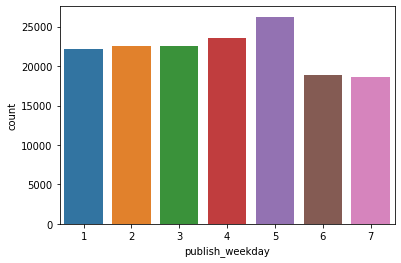

In [ ]:
# Add your code for plot here
sns.countplot(x=combined_data["publish_weekday"])
# Plots will be manually graded
print(combined_data["publish_weekday"].value_counts().max())

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [ ]:
# Add your code here
combined_data = combined_data.drop(['views','likes','dislikes','comment_count','trending_date','title','category','channel_title','thumbnail_link','description','trending_date','tags','publish_time','publish_date'],axis = 1)

#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [ ]:

combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')

# Hint: Use pd.get_dummies()range. 
combined_data = pd.get_dummies(data=combined_data, columns=['video_error_or_removed','ratings_disabled','comments_disabled','country'])




In [ ]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 20)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data.reset_index(drop=True, inplace=True)
combined_data.rename(columns = {'views_log':'label','country_CAvideos.csv':'country_CAvideos','country_FRvideos.csv':'country_FRvideos','country_INvideos.csv':'country_INvideos','country_USvideos.csv':'country_USvideos'}, inplace = True) 
combined_data= combined_data.drop(columns='video_id')
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')


#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [ ]:
# Add your code here
label = combined_data['label']
features = combined_data.drop('label',axis=1)

In [ ]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 18), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
from sklearn.model_selection import train_test_split
# Add your code here

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=.2)


In [ ]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 18), (30914, 18), (123653,), (30914,)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
predictions = linear_reg.predict(x_test)
mse_test = mean_squared_error(y_test, predictions)



In [ ]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, predictions))))

check_lr 0.6900432535395354


#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
# Add your code here
pca = PCA()
pca.fit_transform(x_train)

array([[-5.16779070e+02, -2.40098976e+01,  5.32519281e+00, ...,
        -9.35334785e-16,  4.16136311e-15,  3.56988063e-15],
       [-4.28743403e+02, -2.92004439e+01,  1.20219509e+01, ...,
         7.29087257e-17, -9.13808836e-16,  7.75225839e-16],
       [ 1.77198686e+02,  1.27739970e+01,  1.94942460e+01, ...,
        -3.75869411e-17,  3.79115517e-16, -6.42717291e-16],
       ...,
       [-7.65801936e+02, -3.60498276e+01, -6.60787858e+00, ...,
         9.30325696e-18, -2.31758339e-17, -2.20787022e-18],
       [ 6.61776846e+01,  2.15611641e+01,  1.93856600e+01, ...,
        -2.05949481e-18, -1.51360607e-17, -4.51864875e-19],
       [ 4.05421975e+03,  2.17032380e+01,  2.02211679e+01, ...,
         5.18516820e-18, -2.66268399e-17, -4.17547833e-18]])

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

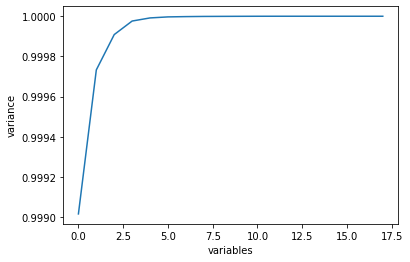

In [ ]:
# Add your code here
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('variables')
plt.ylabel('variance');

In [ ]:
pca = PCA(n_components=4)
pca = pca.fit_transform(features)
modified_var = pca.copy()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(modified_var, label, test_size=.2)

### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here

# depth = []
# nEstimator = [140]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
random_forest = RandomForestRegressor()
grid_search = GridSearchCV(random_forest,{'n_estimators': [140], 'max_depth': [4,5,7]})
grid_search.fit(x_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 140}

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Add your code here
# Set n_estimators = 140
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 140, random_state=30)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
mse = mean_squared_error(y_test, predictions)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, predictions))))

check_rf 0.7531925128092245


## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [ ]:
%%capture
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://se

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = "/content/spark-3.0.2-bin-hadoop3.2"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [ ]:
# Add your code here

train_sdf = spark.read.option("inferSchema", "true").option("header", "true").csv("combined_data.csv")

Let us make sure everything is smooth to proceed

In [ ]:
train_sdf.show()

+---+-----------+------------------+------------------+------------------+------------------+--------+--------+---------+---------------+----------------------------+---------------------------+----------------------+---------------------+-----------------------+----------------------+----------------+----------------+----------------+----------------+
|_c0|category_id|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|publish_weekday|video_error_or_removed_False|video_error_or_removed_True|ratings_disabled_False|ratings_disabled_True|comments_disabled_False|comments_disabled_True|country_CAvideos|country_FRvideos|country_INvideos|country_USvideos|
+---+-----------+------------------+------------------+------------------+------------------+--------+--------+---------+---------------+----------------------------+---------------------------+----------------------+---------------------+-----------------------+----------------------+----

Print out the dataframe schema and verify the datatypes

In [ ]:
#Task: Print the dataframe schema and verify
# Add your code here
train_sdf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- publish_weekday: integer (nullable = true)
 |-- video_error_or_removed_False: integer (nullable = true)
 |-- video_error_or_removed_True: integer (nullable = true)
 |-- ratings_disabled_False: integer (nullable = true)
 |-- ratings_disabled_True: integer (nullable = true)
 |-- comments_disabled_False: integer (nullable = true)
 |-- comments_disabled_True: integer (nullable = true)
 |-- country_CAvideos: integer (nullable = true)
 |-- country_FRvideos: integer (nullable = true)
 |-- country_INvideos: integer (nullable = true)
 |-- country_USvideos: integer (nullable = true)



Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
# Add your code here
all_columns = train_sdf.columns

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [ ]:
# Add your code here
drop_columns = 'label'

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [ ]:
# Add your code
assembler = VectorAssembler().setInputCols(columns_to_use).setOutputCol("features")

In [ ]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_1f121d3cb041\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_1f121d3cb041\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_1f121d3cb041\', name=\'outputCol\', doc=\'output column name.\')]', ['_c0', 'category_id', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'publish_weekday', 'video_error_or_removed_False', 'video_error_or_removed_True', 'ratings_disabled_False', 'ratings_disabled_True',

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [ ]:
from pyspark.ml import Pipeline

# Add your code here

pipeline = Pipeline().setStages([assembler])
modified_data_sdf = pipeline.fit(train_sdf)
modified_data_sdf = modified_data_sdf.transform(train_sdf)

In [ ]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['_c0', 'category_id', 'likes_log', 'label', 'dislikes_log',
       'comment_log', 'num_tags', 'desc_len', 'len_title',
       'publish_weekday', 'video_error_or_removed_False',
       'video_error_or_removed_True', 'ratings_disabled_False',
       'ratings_disabled_True', 'comments_disabled_False',
       'comments_disabled_True', 'country_CAvideos', 'country_FRvideos',
       'country_INvideos', 'country_USvideos', 'features'], dtype=object), 19)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [ ]:
# Add your code here
modified_data_sdf = modified_data_sdf.select('features','label')
train_sdf,test_sdf = modified_data_sdf.randomSplit([.8,.2],seed = 30)

In [ ]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123700, 30867)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [ ]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model=LinearRegression(featuresCol='features',labelCol='label') 
lr_train=lr_model.fit(train_sdf)
predictions_train=lr_train.evaluate(train_sdf) 

In [ ]:
trainingSum = lr_train.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)



RMSE: 0.680902
r2: 0.859494


Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [ ]:
# Add your code here
predictions = lr_train.transform(test_sdf)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set
evaluator = RegressionEvaluator()
test_rmse_orig = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

In [ ]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

result_lr_test [0.6886580816085041, 0      8.437110
1      8.381147
2      7.269156
3      7.511079
4      7.412082
5      7.454209
6      7.744089
7      8.003798
8      7.322307
9      6.841511
10     6.834358
11     8.075225
12     7.687014
13     8.130445
14     8.017564
15     8.114608
16     7.442937
17     7.644919
18     7.623667
19     7.709971
20     7.346288
21     7.324160
22     8.259481
23    11.971418
24    11.589347
25    11.586205
26    11.614809
27    11.579216
28    11.590651
29    12.052754
30    11.619102
31    11.434000
32    11.372540
33    11.651748
34    11.275514
35    11.797450
36    11.423441
37    11.644886
38    11.664624
39    11.580424
40    11.658729
41    11.664314
42    11.645398
43    11.903090
44    11.622248
45    11.405193
46    11.625877
47    11.715591
48    11.536749
49    11.574335
Name: prediction, dtype: float64, 0      8.487146
1      7.990577
2      9.376787
3      7.895436
4      8.347827
5      7.368340
6      7.917901
7      8.306719
8 

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [ ]:
# Add your code here
# Compute predictions using each of the models
lasso_model=LinearRegression(featuresCol='features',labelCol='label',regParam=50,elasticNetParam =1) 
lasso_model_fit=lasso_model.fit(train_sdf)
l1_predictions = lasso_model_fit.transform(test_sdf)

ridge_model=LinearRegression(featuresCol='features',labelCol='label',regParam=50,elasticNetParam =0) 
ridge_model_fit=ridge_model.fit(train_sdf)
l2_predictions = ridge_model_fit.transform(test_sdf)

elastic_net_model=LinearRegression(featuresCol='features',labelCol='label',regParam=50,elasticNetParam =0.5) 
elastic_net_model_fit=elastic_net_model.fit(train_sdf)
elastic_net_predictions = elastic_net_model_fit.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
evaluator = RegressionEvaluator()
test_rmse_l1 = evaluator.evaluate(l1_predictions, {evaluator.metricName: "rmse"})
test_rmse_l2 = evaluator.evaluate(l2_predictions, {evaluator.metricName: "rmse"})
test_rmse_elastic = evaluator.evaluate(elastic_net_predictions, {evaluator.metricName: "rmse"})


In [ ]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [1.8180358615120267, 1.6855801780809374, 1.8180358615120267]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [ ]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = RandomForestRegressor(featuresCol='features',labelCol='label')
rf_model_fit=rf_model.fit(train_sdf)
predictions=rf_model_fit.transform(train_sdf)

In [ ]:
# Add code here to calculate predictions
predictions = rf_model_fit.transform(test_sdf)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
evaluator = RegressionEvaluator()
train_rmse_rf = evaluator.evaluate(predictions)
rmse_rf = evaluator.evaluate(predictions)

In [ ]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark', answer)

check_rf_spark [0.7225515774782854, 0      9.755858
1      9.927422
2      9.755858
3      9.102576
4      9.072858
5      9.027178
6      9.023946
7      9.102576
8      9.059715
9      9.062946
10     8.964288
11    10.323530
12     9.665743
13     9.837307
14     9.665743
15     9.875543
16     9.665743
17     9.665743
18     9.665743
19     9.665743
20     9.665743
21     9.699534
22     9.958793
23    10.796389
24    11.773520
25    11.773520
26    11.424830
27    11.773520
28    11.384918
29    10.964987
30    11.384918
31    11.189360
32    11.189360
33    11.740351
34    11.248530
35    11.365344
36    11.222529
37    11.740351
38    11.378704
39    11.209332
40    11.011351
41    11.011351
42    11.314066
43    11.365344
44    11.384918
45    11.614769
46    11.740351
47    11.011351
48    11.654680
49    11.378704
Name: prediction, dtype: float64, 0      8.487146
1      7.990577
2      9.376787
3      7.895436
4      8.347827
5      7.368340
6      7.917901
7      8.306719
8 

### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [ ]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA
pca = PCA(k=4, inputCol='features', outputCol='pca_features')
model_pca =  pca.fit(modified_data_sdf.select('features'))

features_pca = model_pca.transform(modified_data_sdf.select('features')).select('pca_features')

In [ ]:
features = features_pca.toPandas()
data_df = features.merge(pd.DataFrame(label),left_index=True,right_index=True)
data_sdf=spark.createDataFrame(data_df)

In [ ]:
train_sdf,test_sdf = data_sdf.randomSplit([.8,.2],seed = 42)

In [ ]:
model_pca=LinearRegression(featuresCol='pca_features',labelCol='label') 
model_pca_lr=model_pca.fit(train_sdf)
train_predictions=model_pca_lr.evaluate(train_sdf) 
evaluator = RegressionEvaluator()


In [ ]:
# Add your code here
evaluator = RegressionEvaluator()
predictions = model_pca_lr.transform(test_sdf)
test_rmse_pca_model_lr = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

In [ ]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [ predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca_model_lr]
print('check_pca_spark', answer)

check_pca_spark [0     12.732929
1     12.374461
2     13.111327
3     12.732880
4     12.336570
5     13.215806
6     13.011819
7     13.111052
8     13.011608
9     12.905023
10    13.215668
11    12.336443
12    13.110816
13    12.837027
14    13.231542
15    13.056840
16    12.969907
17    12.782864
18    12.476376
19    13.231277
20    12.782785
21    12.469835
22    12.476041
23    12.486856
24    12.413095
25    12.578257
26    12.782515
27    13.230987
28    13.395685
29    12.469312
30    12.412949
31    12.680252
32    12.518075
33    12.577936
34    12.539068
35    12.095765
36    12.490863
37    13.395175
38    12.753022
39    12.538908
40    13.230056
41    12.490750
42    12.557365
43    12.538787
44    12.469818
45    13.228936
46    12.577025
47    12.797939
48    12.095333
49    13.487401
Name: prediction, dtype: float64, 0     14.145165
1     13.721320
2     13.483123
3     14.136834
4     15.034818
5     16.599757
6     12.882122
7     13.354668
8     12.820728
9    

# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.